# matplotlibの紹介

In [1]:
# ライブラリの読み込み

import matplotlib.pyplot as plt

## Jupyter Notebook + matplotlib を利用する上での基本的な設定

どんなグラフを書く場合でも最初に設定した方が良い3点は以下

- グラフがインラインに埋め込まれるように設定する
- 見栄えをよくするためにグラフのスタイルを変更する
- 日本語が文字化けしないように設定する

### グラフがインラインに埋め込まれるように設定

Jupyter Notebookは，デフォルトのままだとグラフをインラインで表示してくれません．  
グラフを表示させたい場合は設定を行う必要があります．

In [2]:
x = [1, 2, 3]
y = [2, 4, 6]

plt.plot(x, y, 'o--')

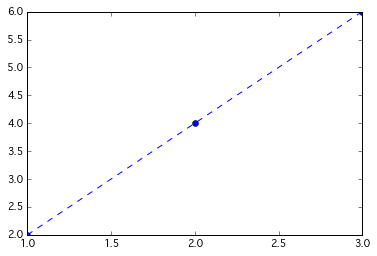

In [5]:
# Jupyter Notebook上にグラフを表示させるための設定
%matplotlib inline

plt.plot(x, y, 'o--')

### グラフのスタイルを変更

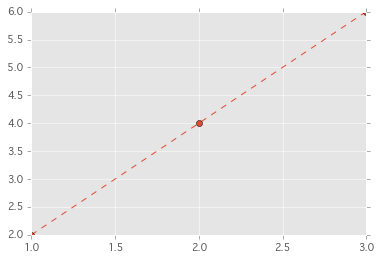

In [4]:
plt.style.use('ggplot')  # R言語のggplot形式に見た目を変更

plt.plot(x, y, 'o--')

### 日本語が文字化けしないように設定

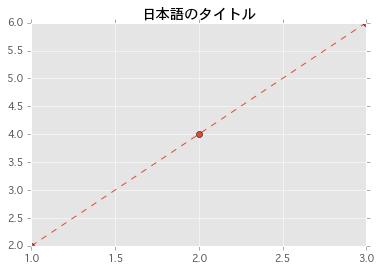

In [5]:
plt.rcParams['font.family'] = 'Osaka'  # 自分の環境に導入している日本語文字コード
plt.plot(x, y, 'o--')

plt.title('日本語のタイトル')

## DataFrameに入ってるデータを描画する

先ほど保存したデータを読み込み

In [3]:
import pandas as pd
df = pd.read_csv('data_all.csv')
df = df.drop('target', axis=1)  # データ描画の都合上除く

pandasのDataFrameから直接matplotlibのグラフ描画機能を利用する.  
__DataFrame.plot(kind='`***`')__ の値を変更するだけで簡単に色々なグラフを描くことが出来る

- 'bar' or 'barh': 棒グラフ
- 'hist': ヒストグラム
- 'box': 箱ひげ図
- 'kde': カーネル密度
- 'scatter': 散布図
- 'pie': 円グラフ
- ...

`figsize=()` を指定することでグラフのサイズを変更できる

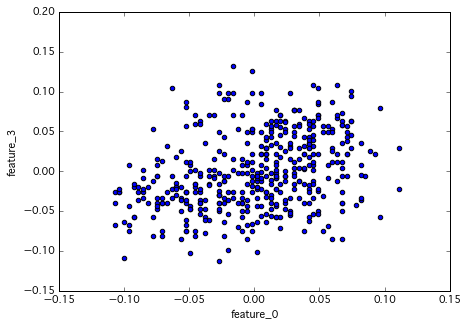

In [6]:
# 散布図
df.plot(kind='scatter', x='feature_0', y='feature_3', figsize=(7, 5))

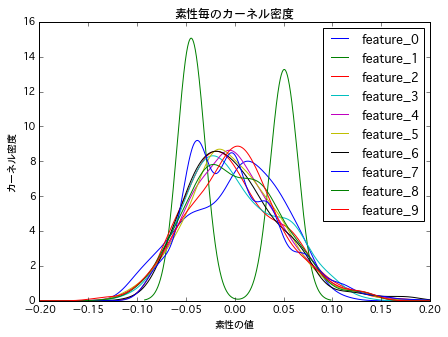

In [7]:
# カーネル密度
df.plot(kind='kde', figsize=(7, 5))

plt.xlim(xmin=-0.2, xmax=0.2)  # 軸のリミットを設定
plt.xlabel('素性の値')                    # x軸のラベル
plt.ylabel('カーネル密度')              # y軸のラベル
plt.title('素性毎のカーネル密度')  # タイトル

## より高度なグラフ描画ライブラリを利用

seabornは，より綺麗で高機能なグラフ描画機能を提供する

In [9]:
# ライブラリの読み込み

import seaborn as sns

- sns.jointplot(x="`***`", y="`***`", kind="`***`", data=df)
    - kind='kde'
    - kind='hex'
    - kind='...'

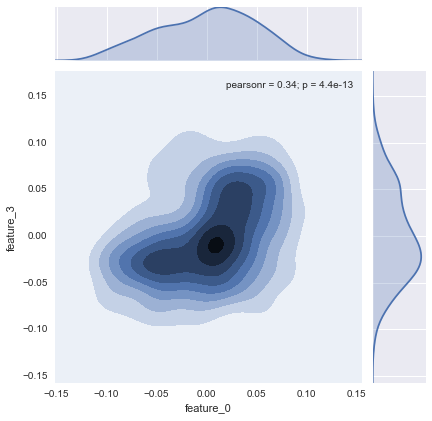

In [10]:
sns.jointplot(x='feature_0', y='feature_3', kind='kde', data=df)

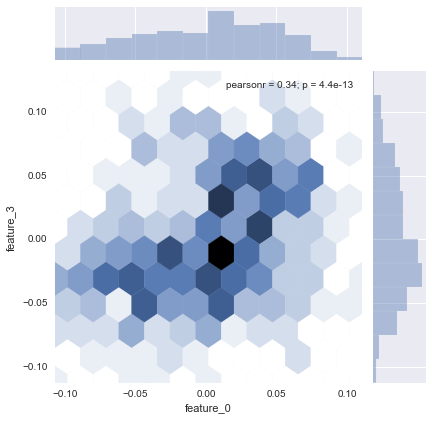

In [11]:
sns.jointplot(x='feature_0', y='feature_3', kind='hex', data=df)

- PairGrid
    - 左上，真ん中，右下それぞれ違う種類のグラフを描画

/Users/amacbee/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


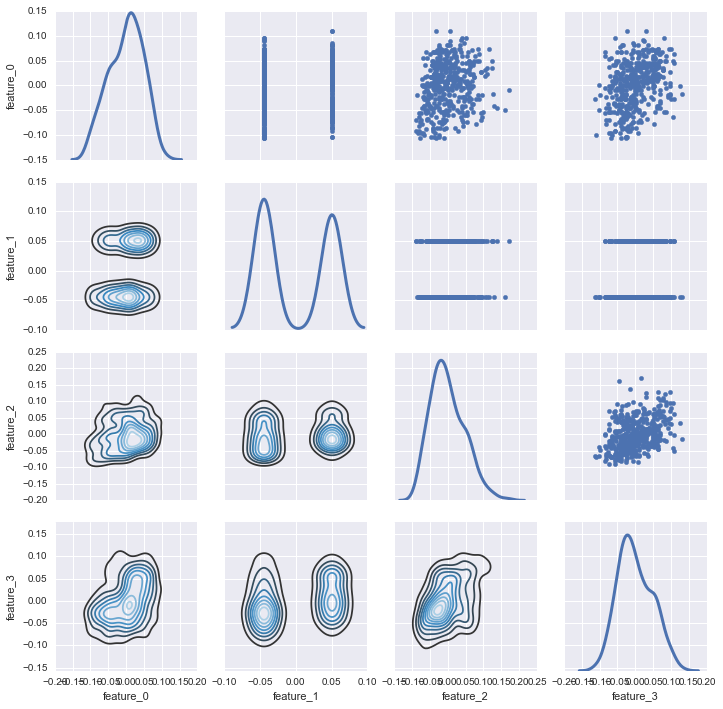

In [12]:
g = sns.PairGrid(df[['feature_0', 'feature_1', 'feature_2', 'feature_3']], diag_sharey=False)

g.map_lower(sns.kdeplot, cmap="Blues_d")  # 下側はカーネル密度（2次元）
g.map_upper(plt.scatter)                                   # 上側は散布図
g.map_diag(sns.kdeplot, lw=3)                          # 対角線はカーネル密度（1次元）